Análisis Exploratorio de los datos(Exploratory Data Analysis = EDA):

El reporte debe incluir un resumen de estadísticas descriptivas de los datasets, análisis univariados (por ejemplo, distribución de variables numéricas), análisis bivariados (correlación entre variables numéricas y/o categóricas); y cualquier análisis que le ayude al mejor entendimiento de los datos (encontrar patrones, outliers y/o anomalías, entre otros). El reporte debe presentarse en un notebook (.ipynb) con adecuado uso de markdowns y comentarios.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spy = yf.download("^GSPC", start="2000-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,4310.620117,4338.509766,4302.700195,4337.439941,4337.439941,3195650000
2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,4273.529785,3472340000
2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,4274.509766,3875880000


In [4]:
dji = yf.download('^DJI', start='2000-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
dji

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,11501.849609,11522.009766,11305.690430,11357.509766,11357.509766,169750000
2000-01-04 00:00:00-05:00,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000
2000-01-05 00:00:00-05:00,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000
2000-01-06 00:00:00-05:00,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000
2000-01-07 00:00:00-05:00,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000
...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,33907.589844,34017.531250,33780.671875,34006.878906,34006.878906,229450000
2023-09-26 00:00:00-04:00,33862.679688,33879.929688,33569.601562,33618.878906,33618.878906,280100000
2023-09-27 00:00:00-04:00,33682.808594,33731.648438,33306.300781,33550.269531,33550.269531,300330000


## REEMPLAZAMOS LOS VALORES NULOS (SI ES QUE EXISTEN) POR '0'

In [6]:
spy.fillna(0, inplace=True)
dji.fillna(0, inplace=True)

## CLASIFICAMOS POR SECTOR E INDUSTRIA

In [7]:
#Clasificamos las empresas por sector e industria
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0][['Symbol', 'Security', 'GICS Sector']].set_index(['Symbol'])

In [8]:
data

,Security,GICS Sector
Symbol,,
MMM,3M,Industrials
AOS,A. O. Smith,Industrials
ABT,Abbott,Health Care
ABBV,AbbVie,Health Care
ACN,Accenture,Information Technology
...,...,...
YUM,Yum! Brands,Consumer Discretionary
ZBRA,Zebra Technologies,Information Technology
ZBH,Zimmer Biomet,Health Care


## CREAMOS UN DF POR CADA SECTOR DEL SPY

In [9]:
#Vemos que sectores tenemos, eliminando los duplicados
sectores = list(set(data['GICS Sector']))
sectores

['Financials',
 'Consumer Staples',
 'Communication Services',
 'Materials',
 'Utilities',
 'Industrials',
 'Energy',
 'Information Technology',
 'Real Estate',
 'Consumer Discretionary',
 'Health Care']

In [10]:
consumer_df = data[data['GICS Sector'] == 'Consumer Discretionary']
consumer_df

,Security,GICS Sector
Symbol,,
ABNB,Airbnb,Consumer Discretionary
AMZN,Amazon,Consumer Discretionary
APTV,Aptiv,Consumer Discretionary
AZO,AutoZone,Consumer Discretionary
BBWI,"Bath & Body Works, Inc.",Consumer Discretionary
BBY,Best Buy,Consumer Discretionary
BKNG,Booking Holdings,Consumer Discretionary
BWA,BorgWarner,Consumer Discretionary
CZR,Caesars Entertainment,Consumer Discretionary


In [11]:
energia_df = data[data['GICS Sector'] == 'Energy']
energia_df

,Security,GICS Sector
Symbol,,
APA,APA Corporation,Energy
BKR,Baker Hughes,Energy
CVX,Chevron Corporation,Energy
COP,ConocoPhillips,Energy
CTRA,Coterra,Energy
DVN,Devon Energy,Energy
FANG,Diamondback Energy,Energy
EOG,EOG Resources,Energy
EQT,EQT,Energy


In [12]:
xle = yf.download('XLE', start='2000-01-01')

[*********************100%***********************]  1 of 1 completed


In [13]:
xle

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,27.312500,27.312500,26.375000,26.562500,14.442974,380300
2000-01-04 00:00:00-05:00,26.312500,26.312500,25.875000,26.062500,14.171101,722200
2000-01-05 00:00:00-05:00,26.125000,26.750000,26.000000,26.750000,14.544919,337800
2000-01-06 00:00:00-05:00,26.750000,27.843750,26.750000,27.781250,15.105644,133100
2000-01-07 00:00:00-05:00,27.687500,28.406250,27.687500,28.078125,15.267063,468000
...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,89.070000,90.570000,89.070000,90.430000,90.430000,17536900
2023-09-26 00:00:00-04:00,89.650002,90.449997,89.510002,89.910004,89.910004,16730000
2023-09-27 00:00:00-04:00,91.029999,92.410004,90.629997,92.150002,92.150002,23144700


In [14]:
energicas = ['APA', 
            'BKR',
            'CVX',
            'COP',
            'CTRA',
            'DVN', 
            'FANG', 
            'EOG', 
            'EQT', 
            'XOM', 
            'HAL', 
            'HES', 
            'KMI', 
            'MRO', 
            'MPC', 
            'OXY', 
            'OKE', 
            'PSX', 
            'PXD', 
            'SLB', 
            'TRGP', 
            'VLO', 
            'WMB'
]

recolector = []
for nemo in energicas:
    ticker = yf.Ticker(nemo)
    px = ticker.history(start='2000-01-01', interval='1d')[['Open', 'Close','Volume']]
    px.columns = [f"{nemo}_{col}" for col in px.columns]
    recolector.append(px)

energy_spy = pd.concat(recolector, axis=1)


In [15]:
energy_spy

,APA_Open,APA_Close,APA_Volume,BKR_Open,BKR_Close,BKR_Volume,CVX_Open,CVX_Close,CVX_Volume,COP_Open,...,SLB_Volume,TRGP_Open,TRGP_Close,TRGP_Volume,VLO_Open,VLO_Close,VLO_Volume,WMB_Open,WMB_Close,WMB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,12.023589,11.183781,1082697,10.341514,9.546013,1468700,17.979550,17.508471,4387600,8.298217,...,7239800,NaN,NaN,NaN,2.584543,2.487014,966658,9.618417,9.618417,2366796
2000-01-04 00:00:00-05:00,10.815085,10.692186,2959572,9.457624,9.546013,2082300,17.364529,17.508471,3702400,8.008224,...,7963000,NaN,NaN,NaN,2.478887,2.462632,1176269,9.153009,9.405105,3364720
2000-01-05 00:00:00-05:00,10.774118,10.999433,2170014,9.604939,9.604939,1833700,17.390702,17.822525,5567600,7.974764,...,4826200,NaN,NaN,NaN,2.487014,2.552034,866010,9.463283,9.986866,2731730
2000-01-06 00:00:00-05:00,11.306683,12.044075,2416029,9.752251,10.518289,2234700,17.861778,18.581484,4353400,7.807462,...,8005000,NaN,NaN,NaN,2.552034,2.633309,1265102,9.986863,10.200175,8654732
2000-01-07 00:00:00-05:00,12.207940,12.003108,1709169,10.724530,11.225401,2810600,18.843195,18.908623,4487400,8.119761,...,7368600,NaN,NaN,NaN,2.633310,2.600800,564504,10.238965,10.471668,2319625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,40.220001,41.020000,1892700,35.330002,35.900002,5353800,166.330002,168.710007,5510000,118.694246,...,6279300,84.220001,85.320000,1498700.0,145.270004,146.539993,3241900,33.520000,33.959999,4871000
2023-09-26 00:00:00-04:00,40.590000,41.049999,2827700,35.669998,35.709999,6450200,167.440002,167.800003,5659200,119.201703,...,5796100,84.500000,84.349998,1661700.0,145.020004,141.580002,4936800,33.680000,33.580002,7772700
2023-09-27 00:00:00-04:00,41.930000,42.380001,4192200,36.160000,36.250000,6932300,169.369995,171.039993,9124400,121.720001,...,7663100,85.309998,86.589996,1650600.0,142.750000,143.949997,3644000,33.810001,34.099998,5594800


In [16]:
utilities_df = data[data['GICS Sector'] == 'Utilities']
utilities_df

,Security,GICS Sector
Symbol,,
AES,AES Corporation,Utilities
LNT,Alliant Energy,Utilities
AEE,Ameren,Utilities
AEP,American Electric Power,Utilities
AWK,American Water Works,Utilities
ATO,Atmos Energy,Utilities
CNP,CenterPoint Energy,Utilities
CMS,CMS Energy,Utilities
ED,Consolidated Edison,Utilities


In [17]:
communication_df = data[data['GICS Sector'] == 'Communication Services']
communication_df

,Security,GICS Sector
Symbol,,
ATVI,Activision Blizzard,Communication Services
GOOGL,Alphabet Inc. (Class A),Communication Services
GOOG,Alphabet Inc. (Class C),Communication Services
T,AT&T,Communication Services
CHTR,Charter Communications,Communication Services
CMCSA,Comcast,Communication Services
DIS,Disney,Communication Services
EA,Electronic Arts,Communication Services
FOXA,Fox Corporation (Class A),Communication Services


In [18]:
realstate_df = data[data['GICS Sector'] == 'Real Estate']
realstate_df

,Security,GICS Sector
Symbol,,
ARE,Alexandria Real Estate Equities,Real Estate
AMT,American Tower,Real Estate
AVB,AvalonBay Communities,Real Estate
BXP,Boston Properties,Real Estate
CPT,Camden Property Trust,Real Estate
CBRE,CBRE Group,Real Estate
CSGP,CoStar Group,Real Estate
CCI,Crown Castle,Real Estate
DLR,Digital Realty,Real Estate


In [19]:
healthcare_df = data[data['GICS Sector'] == 'Health Care']
healthcare_df

,Security,GICS Sector
Symbol,,
ABT,Abbott,Health Care
ABBV,AbbVie,Health Care
A,Agilent Technologies,Health Care
ALGN,Align Technology,Health Care
AMGN,Amgen,Health Care
...,...,...
VTRS,Viatris,Health Care
WAT,Waters Corporation,Health Care
WST,West Pharmaceutical Services,Health Care


In [20]:
materials_df = data[data['GICS Sector'] == 'Materials']
materials_df

,Security,GICS Sector
Symbol,,
APD,Air Products and Chemicals,Materials
ALB,Albemarle Corporation,Materials
AMCR,Amcor,Materials
AVY,Avery Dennison,Materials
BALL,Ball Corporation,Materials
CE,Celanese,Materials
CF,CF Industries,Materials
CTVA,Corteva,Materials
DOW,Dow Inc.,Materials


In [21]:
consumerstaples_df = data[data['GICS Sector'] == 'Consumer Staples']
consumerstaples_df

,Security,GICS Sector
Symbol,,
ADM,ADM,Consumer Staples
MO,Altria,Consumer Staples
BF.B,Brown–Forman,Consumer Staples
BG,Bunge Limited,Consumer Staples
CPB,Campbell Soup Company,Consumer Staples
CHD,Church & Dwight,Consumer Staples
CLX,Clorox,Consumer Staples
KO,Coca-Cola Company (The),Consumer Staples
CL,Colgate-Palmolive,Consumer Staples


In [22]:
information_df = data[data['GICS Sector'] == 'Information Technology']
information_df

,Security,GICS Sector
Symbol,,
ACN,Accenture,Information Technology
ADBE,Adobe Inc.,Information Technology
AKAM,Akamai,Information Technology
AMD,AMD,Information Technology
APH,Amphenol,Information Technology
...,...,...
TRMB,Trimble Inc.,Information Technology
TYL,Tyler Technologies,Information Technology
VRSN,Verisign,Information Technology


In [23]:
financials_df = data[data['GICS Sector'] == 'Financials']
financials_df

,Security,GICS Sector
Symbol,,
AFL,Aflac,Financials
ALL,Allstate,Financials
AXP,American Express,Financials
AIG,American International Group,Financials
AMP,Ameriprise Financial,Financials
...,...,...
USB,U.S. Bank,Financials
V,Visa Inc.,Financials
WFC,Wells Fargo,Financials


In [24]:
industrial_df = data[data['GICS Sector'] == 'Industrials']
industrial_df

,Security,GICS Sector
Symbol,,
MMM,3M,Industrials
AOS,A. O. Smith,Industrials
ADP,ADP,Industrials
ALK,Alaska Air Group,Industrials
ALLE,Allegion,Industrials
...,...,...
VRSK,Verisk,Industrials
WAB,Wabtec,Industrials
WM,Waste Management,Industrials


## ESTADISTICAS DESCRIPTIVAS DEL SPY

In [25]:
# Resumen de estadísticas descriptivas
print(data.describe())

       Security  GICS Sector
count       503          503
unique      503           11
top          3M  Industrials
freq          1           75


## ANALISIS UNIVARIADO DE CADA COLUMNA DEL SPY

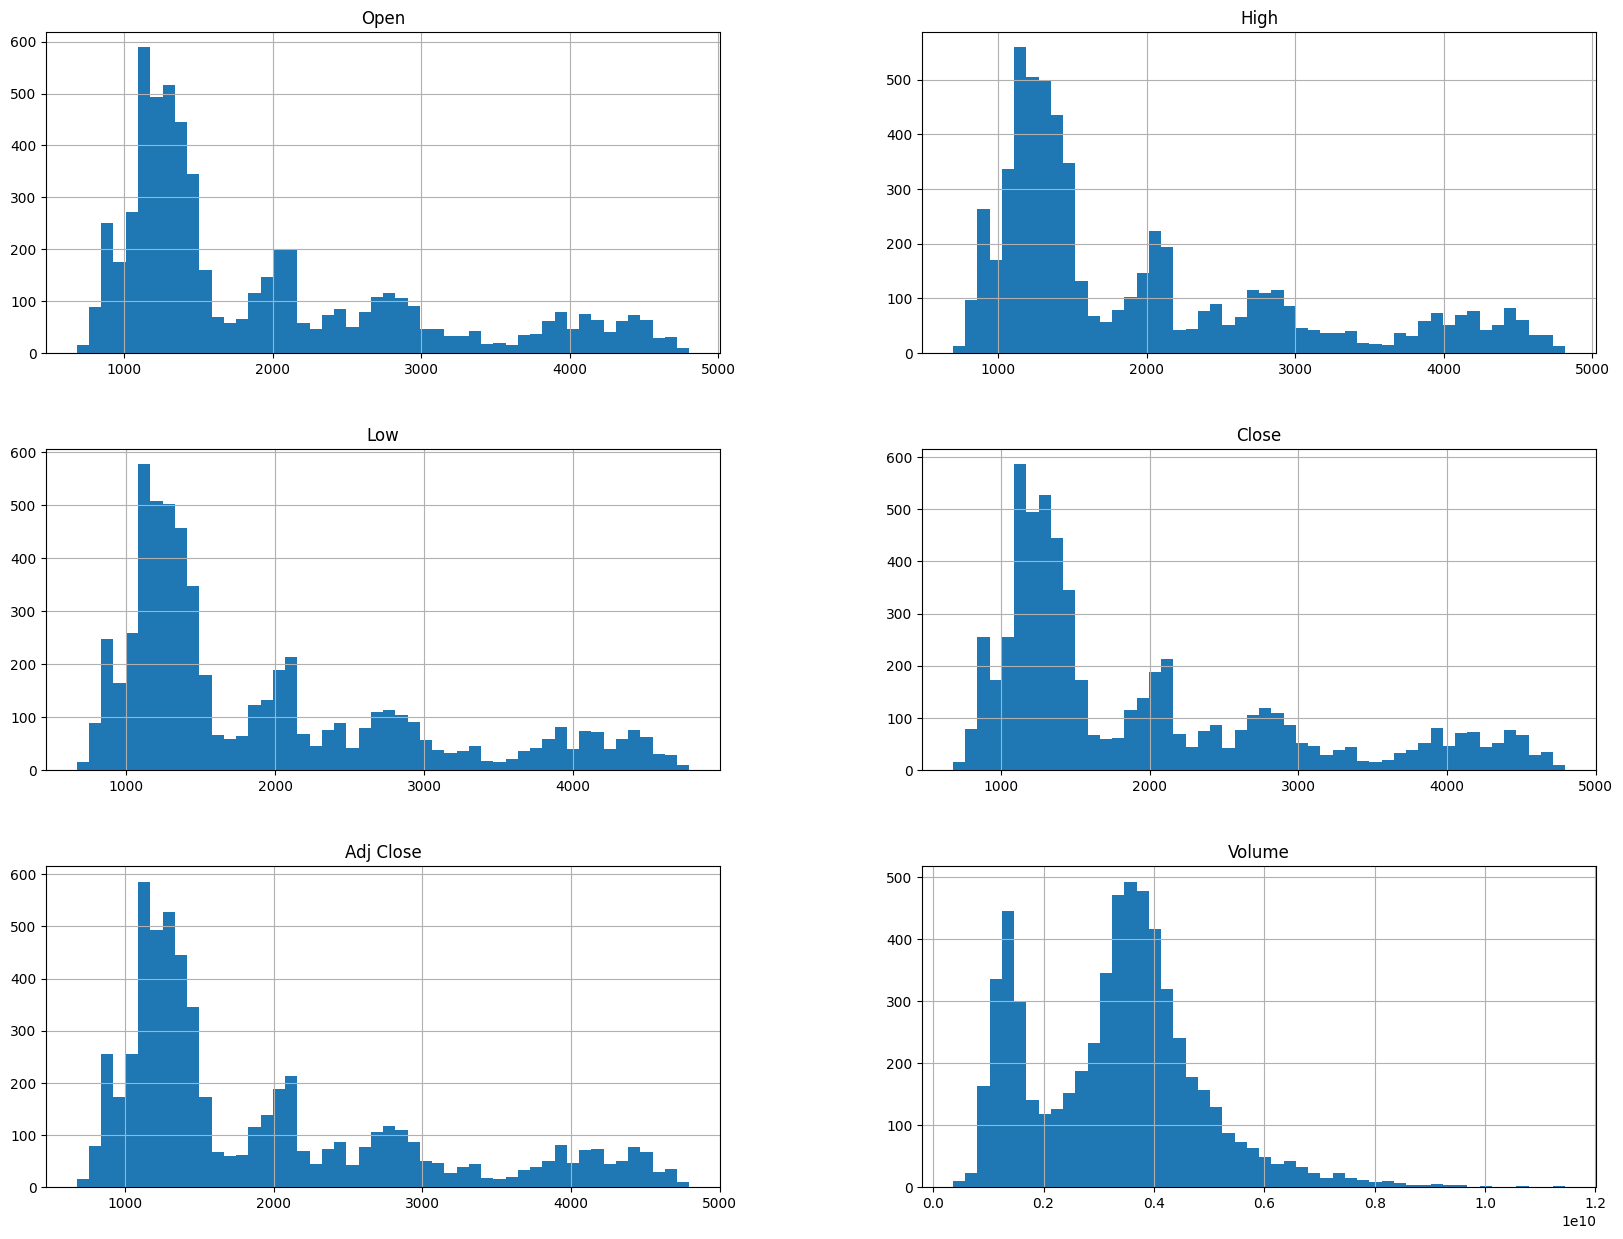

In [26]:
# Seleccionar las columnas numéricas para el análisis univariado
num_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
datos = spy[num_cols]

# Histogramas de cada columna
datos.hist(bins=50, figsize=(20,15))
plt.show()

## ANALISIS BIVARIADO
CORRELACION ENTRE TODAS LAS COLUMNAS

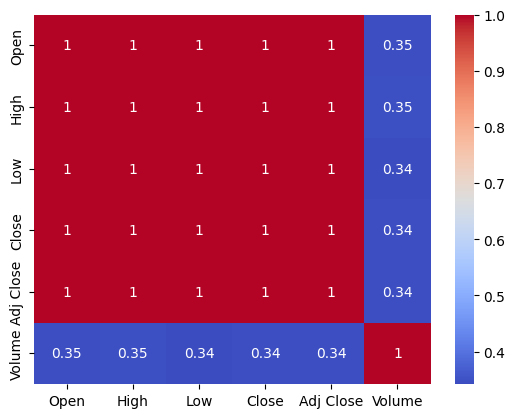

In [27]:
num_data = spy[num_cols]

# Calcula la matriz de correlación
corr_matrix = num_data.corr()

# Grafica el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#Se puede detallar la correlacion entre columnas, si la correlacion es cercana a 1 indica que hay una relación positiva fuerte entre las variables.
#Por otro lado, si la correlación es cercana a -1, indica que hay una relación negativa fuerte entre las variables.
#Si la correlación es cercana a 0, indica que no hay una relación lineal fuerte entre las variables.

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## GRAFICA PARA IDENTIFICAR PATRONES

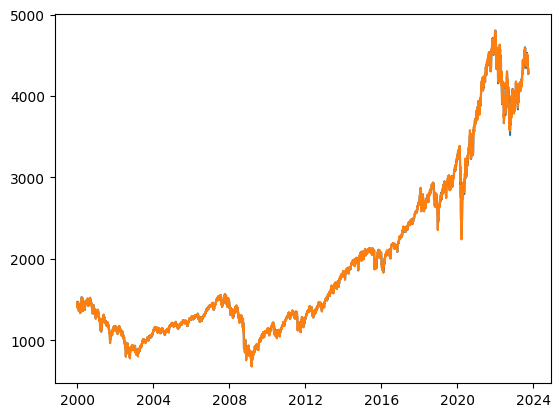

In [29]:
#Creamos la grafica para identificar patrones
plt.plot(spy['Open'])
plt.plot(spy['Close'])
plt.show()

## CORRELACION ENTRE OPEN Y CLOSE DEL SPY

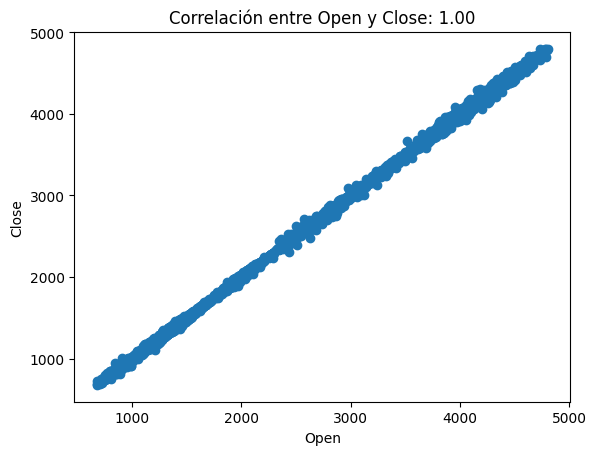

In [30]:
# Calcular la correlación
corr = spy['Open'].corr(spy['Close'])

# Visualizar la correlación
plt.scatter(spy['Open'], spy['Close'])
plt.title(f"Correlación entre Open y Close: {corr:.2f}")
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

## CORRELACION ENTRE VOLUMEN Y CLOSE DEL SPY

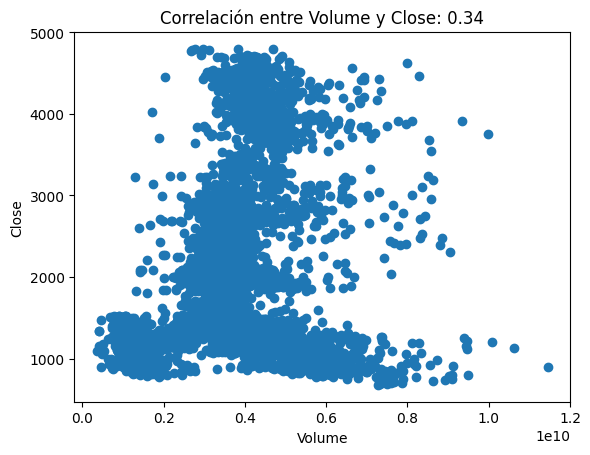

In [31]:
# Calcular la correlación
corr = spy['Volume'].corr(spy['Close'])

# Visualizar la correlación
plt.scatter(spy['Volume'], spy['Close'])
plt.title(f"Correlación entre Volume y Close: {corr:.2f}")
plt.xlabel("Volume")
plt.ylabel("Close")
plt.show()

## CORRELACION ENTRE HIGH Y LOW DEL SPY

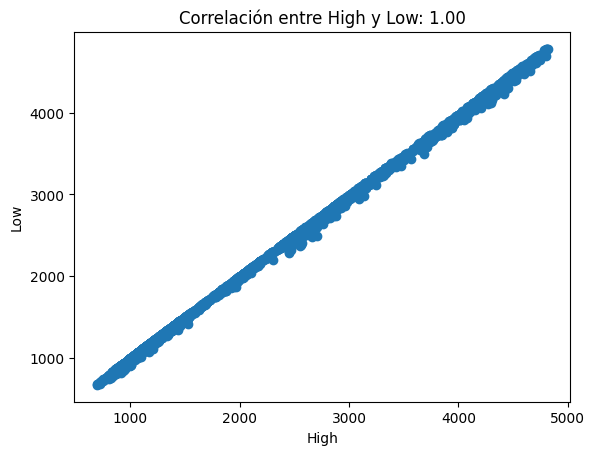

In [32]:
# Calcular la correlación
corr = spy['High'].corr(spy['Low'])

# Visualizar la correlación
plt.scatter(spy['High'], spy['Low'])
plt.title(f"Correlación entre High y Low: {corr:.2f}")
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

## PROBAMOS IMPORTANDO OTROS INDICADORES IMPORTANTES PARA HACER CORRELACIONES

## CORRELACION ENTRE LOS PRECIOS DE CIERRE DEL DJI Y SPY

<AxesSubplot: >

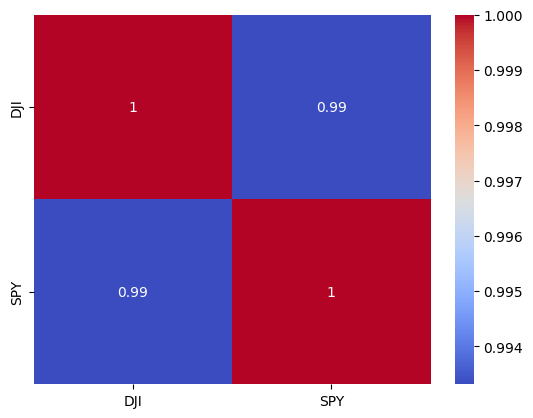

In [33]:
df_dij = pd.DataFrame({'DJI': dji['Close'], 'SPY': spy['Close']})
corr_matrix = df_dij.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [34]:
df2 = pd.DataFrame({'DJIA': dji['Close'], 'SPY': spy['Close']})
df_ret = df2.pct_change().dropna()
df_ret.corr()


,DJIA,SPY
DJIA,1.000000,0.966137
SPY,0.966137,1.000000


## CORRELACION ENTRE LA VOLATILIDAD DIARIA

In [35]:
df3 = pd.DataFrame({'DJIA': dji['Close'], 'SPY': spy['Close']})
df_ret = df3.pct_change().dropna()
df_vol = df_ret.rolling(window=30).std().dropna()
df_vol.corr()

,DJIA,SPY
DJIA,1.000000,0.984826
SPY,0.984826,1.000000


## Correlación entre volumen del SPY y del DJIA

## BUSCAMOS DE DONDE PROVIENE EL OUTLIER

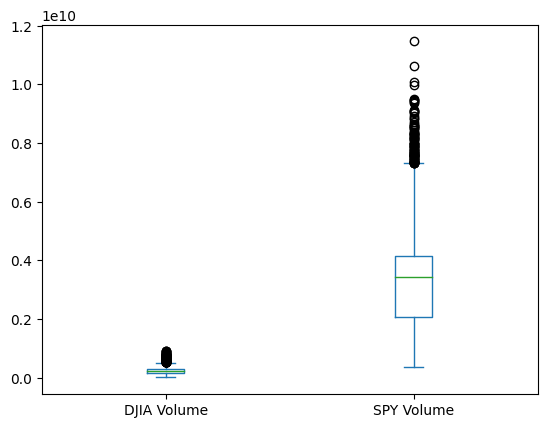

In [36]:
# Combinar los datos en un solo DataFrame
dfv = pd.DataFrame({'DJIA': dji['Close'], 'SPY': spy['Close'], 'DJIA Volume': dji['Volume'], 'SPY Volume': spy['Volume']})

# Graficar el volumen del DJIA y el SPY
dfv[['DJIA Volume', 'SPY Volume']].plot(kind='box')
plt.show()

## SELECCIONAMOS UN SECTOR Y UN GRUPO DE EMPRESAS PAR ANALIZAR

In [37]:
empresas = [
    'BKR', # Baker Hughes
    'CVX', # Chevron
    'HAL',  # Halliburton
    'SLB', # Schlumberger
    'CTRA', # Coterra
]

recolector = []
for nemo in empresas:
    ticker = yf.Ticker(nemo)
    px = ticker.history(start='2000-01-01', interval='1d')[['Open', 'Close','Volume']]
    px.columns = [f"{nemo}_{col}" for col in px.columns]
    recolector.append(px)

precios = pd.concat(recolector, axis=1)


In [38]:
precios

,BKR_Open,BKR_Close,BKR_Volume,CVX_Open,CVX_Close,CVX_Volume,HAL_Open,HAL_Close,HAL_Volume,SLB_Open,SLB_Close,SLB_Volume,CTRA_Open,CTRA_Close,CTRA_Volume
Date,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,10.341515,9.546014,1468700,17.979545,17.508465,4387600,14.072750,13.333223,3490800,17.870418,17.649548,7239800,0.984162,0.907573,1306800
2000-01-04 00:00:00-05:00,9.457625,9.546014,2082300,17.364524,17.508465,3702400,13.072208,13.398470,4968200,17.328281,17.408598,7963000,0.899914,0.880767,334800
2000-01-05 00:00:00-05:00,9.604937,9.604937,1833700,17.390689,17.822512,5567600,13.050459,12.811200,7524600,17.368444,17.368444,4826200,0.873108,0.896085,363600
2000-01-06 00:00:00-05:00,9.752252,10.518290,2234700,17.861778,18.581484,4353400,12.811205,13.333223,8868600,17.468845,18.553118,8005000,0.892256,0.915232,538800
2000-01-07 00:00:00-05:00,10.724528,11.225399,2810600,18.843184,18.908611,4487400,13.659484,14.159752,8737400,18.773978,18.894453,7368600,0.915232,0.953526,388800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,35.330002,35.900002,5353800,166.330002,168.710007,5510000,40.549999,40.980000,4243700,58.930000,59.840000,6279300,26.100000,26.570000,6055000
2023-09-26 00:00:00-04:00,35.669998,35.709999,6450200,167.440002,167.800003,5659200,40.520000,40.790001,5599300,59.150002,59.130001,5796100,26.200001,26.340000,5263300
2023-09-27 00:00:00-04:00,36.160000,36.250000,6932300,169.369995,171.039993,9124400,41.430000,42.029999,5787200,60.000000,60.799999,7663100,26.840000,27.139999,4937100


In [39]:
# Identificar los valores nulos
print(precios.isnull())

# Contar los valores nulos por columna
print(precios.isnull().sum())

                           BKR_Open  BKR_Close  BKR_Volume  CVX_Open  \
Date                                                                   
2000-01-03 00:00:00-05:00     False      False       False     False   
2000-01-04 00:00:00-05:00     False      False       False     False   
2000-01-05 00:00:00-05:00     False      False       False     False   
2000-01-06 00:00:00-05:00     False      False       False     False   
2000-01-07 00:00:00-05:00     False      False       False     False   
...                             ...        ...         ...       ...   
2023-09-25 00:00:00-04:00     False      False       False     False   
2023-09-26 00:00:00-04:00     False      False       False     False   
2023-09-27 00:00:00-04:00     False      False       False     False   
2023-09-28 00:00:00-04:00     False      False       False     False   
2023-09-29 00:00:00-04:00     False      False       False     False   

                           CVX_Close  CVX_Volume  HAL_Open  HAL

In [40]:
# Resumen estadístico
print(precios.describe())

          BKR_Open    BKR_Close    BKR_Volume     CVX_Open    CVX_Close  \
count  5974.000000  5974.000000  5.974000e+03  5974.000000  5974.000000   
mean     25.909161    25.901802  4.756708e+06    62.730310    62.735125   
std       8.379221     8.374287  3.487708e+06    37.720667    37.724734   
min       8.666834     8.362105  0.000000e+00    14.343896    14.258602   
25%      19.135311    19.134268  2.673925e+06    30.201958    30.198125   
50%      25.023136    25.016689  3.976850e+06    61.909219    62.026035   
75%      31.718099    31.745998  5.804100e+06    83.043982    83.075939   
max      51.060979    50.931908  7.909050e+07   180.536611   182.584579   

         CVX_Volume     HAL_Open    HAL_Close    HAL_Volume     SLB_Open  \
count  5.974000e+03  5974.000000  5974.000000  5.974000e+03  5974.000000   
mean   8.193286e+06    26.127465    26.116987  1.214742e+07    43.090775   
std    4.281609e+06    12.173694    12.173250  7.527288e+06    18.923148   
min    1.067000e+06 

## CREO UNA GRAFICA CON LOS PRECIOS DE APERTURA Y CIERRE DE LAS 5 EMPRESAS QUE TOME

In [41]:
import matplotlib.dates as mdates

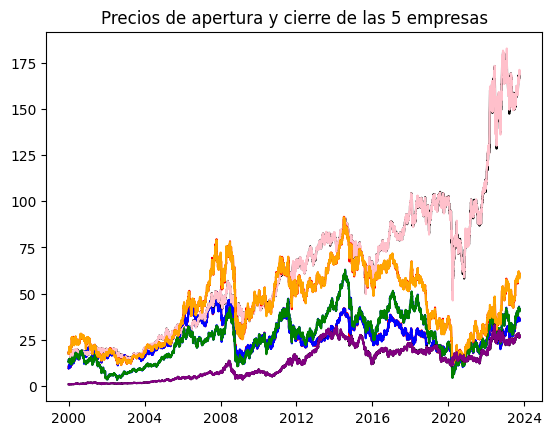

In [42]:
plt.plot(precios['BKR_Open'], color='red')
plt.plot(precios['BKR_Close'], color='blue')
plt.plot(precios['CVX_Open'], color='black')
plt.plot(precios['CVX_Close'], color='pink')
plt.plot(precios['HAL_Open'], color='blue')
plt.plot(precios['HAL_Close'], color='green')
plt.plot(precios['SLB_Open'], color='red')
plt.plot(precios['SLB_Close'], color='orange')
plt.plot(precios['CTRA_Open'], color='black')
plt.plot(precios['CTRA_Close'], color='purple')
plt.title('Precios de apertura y cierre de las 5 empresas')
plt.show()

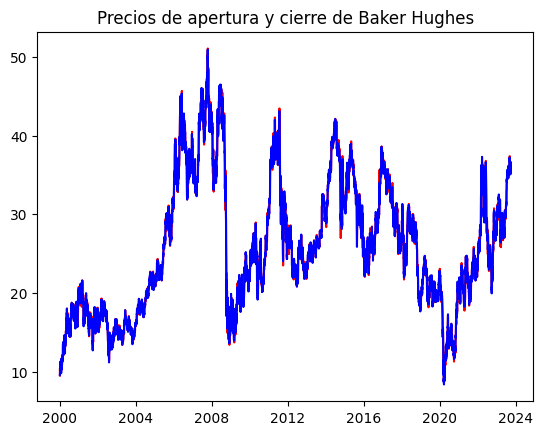

In [43]:
plt.plot(precios['BKR_Open'], color='red')
plt.plot(precios['BKR_Close'], color='blue')
plt.title('Precios de apertura y cierre de Baker Hughes')
plt.show()

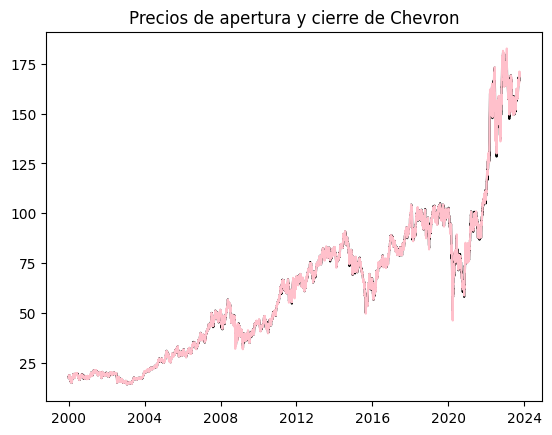

In [44]:
plt.plot(precios['CVX_Open'], color='black')
plt.plot(precios['CVX_Close'], color='pink')
plt.title('Precios de apertura y cierre de Chevron')
plt.show()

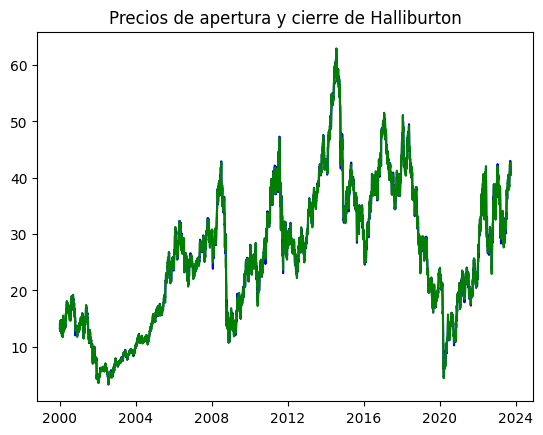

In [45]:
plt.plot(precios['HAL_Open'], color='blue')
plt.plot(precios['HAL_Close'], color='green')
plt.title('Precios de apertura y cierre de Halliburton')
plt.show()

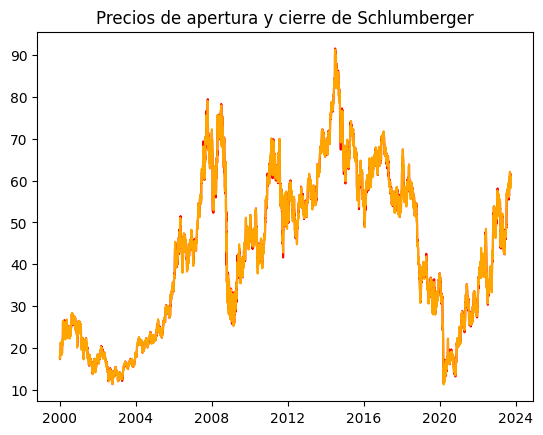

In [46]:
plt.plot(precios['SLB_Open'], color='red')
plt.plot(precios['SLB_Close'], color='orange')
plt.title('Precios de apertura y cierre de Schlumberger')
plt.show()

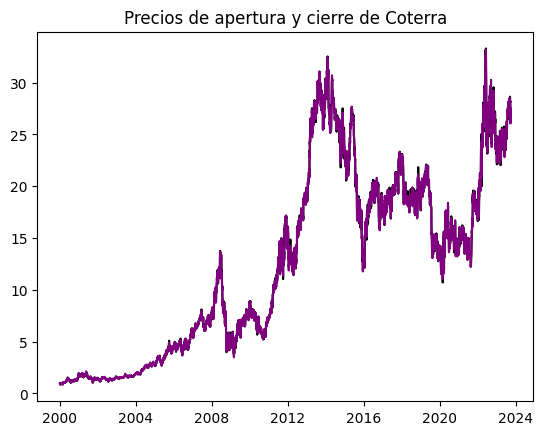

In [47]:
plt.plot(precios['CTRA_Open'], color='black')
plt.plot(precios['CTRA_Close'], color='purple')
plt.title('Precios de apertura y cierre de Coterra')
plt.show()

In [48]:
cvx = yf.download('CVX', start='2000-01-01')

[*********************100%***********************]  1 of 1 completed


In [49]:
cvx

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,42.937500,42.937500,41.281250,41.812500,17.508463,4387600
2000-01-04 00:00:00-05:00,41.468750,42.062500,41.250000,41.812500,17.508463,3702400
2000-01-05 00:00:00-05:00,41.531250,43.281250,41.531250,42.562500,17.822512,5567600
2000-01-06 00:00:00-05:00,42.656250,44.593750,42.656250,44.375000,18.581484,4353400
2000-01-07 00:00:00-05:00,45.000000,45.437500,44.500000,45.156250,18.908617,4487400
...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,166.330002,168.779999,165.990005,168.710007,168.710007,5510000
2023-09-26 00:00:00-04:00,167.440002,168.410004,166.979996,167.800003,167.800003,5659200
2023-09-27 00:00:00-04:00,169.369995,171.229996,168.809998,171.039993,171.039993,9124400


## PASO A CSV EL DATABASE DE LAS EMPRESAS Y EL DE EL SPY

In [50]:
xle = xle.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

xle['Dias'] = xle['Date'].dt.dayofweek.map(dias)
xle['Date'] = xle['Date'].dt.date


xle

,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-01-03,27.312500,27.312500,26.375000,26.562500,14.442974,380300,Lunes
1,2000-01-04,26.312500,26.312500,25.875000,26.062500,14.171101,722200,Martes
2,2000-01-05,26.125000,26.750000,26.000000,26.750000,14.544919,337800,Miercoles
3,2000-01-06,26.750000,27.843750,26.750000,27.781250,15.105644,133100,Jueves
4,2000-01-07,27.687500,28.406250,27.687500,28.078125,15.267063,468000,Viernes
...,...,...,...,...,...,...,...,...
5969,2023-09-25,89.070000,90.570000,89.070000,90.430000,90.430000,17536900,Lunes
5970,2023-09-26,89.650002,90.449997,89.510002,89.910004,89.910004,16730000,Martes
5971,2023-09-27,91.029999,92.410004,90.629997,92.150002,92.150002,23144700,Miercoles
5972,2023-09-28,91.750000,92.790001,91.540001,92.250000,92.250000,24231400,Jueves


In [51]:
energy_spy = energy_spy.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

energy_spy['Dias'] = energy_spy['Date'].dt.dayofweek.map(dias)
energy_spy['Date'] = energy_spy['Date'].dt.date


energy_spy

,Date,APA_Open,APA_Close,APA_Volume,BKR_Open,BKR_Close,BKR_Volume,CVX_Open,CVX_Close,CVX_Volume,...,TRGP_Open,TRGP_Close,TRGP_Volume,VLO_Open,VLO_Close,VLO_Volume,WMB_Open,WMB_Close,WMB_Volume,Dias
0,2000-01-03,12.023589,11.183781,1082697,10.341514,9.546013,1468700,17.979550,17.508471,4387600,...,NaN,NaN,NaN,2.584543,2.487014,966658,9.618417,9.618417,2366796,Lunes
1,2000-01-04,10.815085,10.692186,2959572,9.457624,9.546013,2082300,17.364529,17.508471,3702400,...,NaN,NaN,NaN,2.478887,2.462632,1176269,9.153009,9.405105,3364720,Martes
2,2000-01-05,10.774118,10.999433,2170014,9.604939,9.604939,1833700,17.390702,17.822525,5567600,...,NaN,NaN,NaN,2.487014,2.552034,866010,9.463283,9.986866,2731730,Miercoles
3,2000-01-06,11.306683,12.044075,2416029,9.752251,10.518289,2234700,17.861778,18.581484,4353400,...,NaN,NaN,NaN,2.552034,2.633309,1265102,9.986863,10.200175,8654732,Jueves
4,2000-01-07,12.207940,12.003108,1709169,10.724530,11.225401,2810600,18.843195,18.908623,4487400,...,NaN,NaN,NaN,2.633310,2.600800,564504,10.238965,10.471668,2319625,Viernes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,2023-09-25,40.220001,41.020000,1892700,35.330002,35.900002,5353800,166.330002,168.710007,5510000,...,84.220001,85.320000,1498700.0,145.270004,146.539993,3241900,33.520000,33.959999,4871000,Lunes
5970,2023-09-26,40.590000,41.049999,2827700,35.669998,35.709999,6450200,167.440002,167.800003,5659200,...,84.500000,84.349998,1661700.0,145.020004,141.580002,4936800,33.680000,33.580002,7772700,Martes
5971,2023-09-27,41.930000,42.380001,4192200,36.160000,36.250000,6932300,169.369995,171.039993,9124400,...,85.309998,86.589996,1650600.0,142.750000,143.949997,3644000,33.810001,34.099998,5594800,Miercoles
5972,2023-09-28,42.400002,42.230000,2365000,36.250000,36.590000,5879800,170.550003,170.589996,7151800,...,86.519997,87.440002,1467200.0,143.529999,147.179993,3587300,34.150002,34.410000,5824400,Jueves


In [52]:
precios = precios.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

precios['Dias'] = precios['Date'].dt.dayofweek.map(dias)
precios['Date'] = precios['Date'].dt.date


precios

,Date,BKR_Open,BKR_Close,BKR_Volume,CVX_Open,CVX_Close,CVX_Volume,HAL_Open,HAL_Close,HAL_Volume,SLB_Open,SLB_Close,SLB_Volume,CTRA_Open,CTRA_Close,CTRA_Volume,Dias
0,2000-01-03,10.341515,9.546014,1468700,17.979545,17.508465,4387600,14.072750,13.333223,3490800,17.870418,17.649548,7239800,0.984162,0.907573,1306800,Lunes
1,2000-01-04,9.457625,9.546014,2082300,17.364524,17.508465,3702400,13.072208,13.398470,4968200,17.328281,17.408598,7963000,0.899914,0.880767,334800,Martes
2,2000-01-05,9.604937,9.604937,1833700,17.390689,17.822512,5567600,13.050459,12.811200,7524600,17.368444,17.368444,4826200,0.873108,0.896085,363600,Miercoles
3,2000-01-06,9.752252,10.518290,2234700,17.861778,18.581484,4353400,12.811205,13.333223,8868600,17.468845,18.553118,8005000,0.892256,0.915232,538800,Jueves
4,2000-01-07,10.724528,11.225399,2810600,18.843184,18.908611,4487400,13.659484,14.159752,8737400,18.773978,18.894453,7368600,0.915232,0.953526,388800,Viernes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,2023-09-25,35.330002,35.900002,5353800,166.330002,168.710007,5510000,40.549999,40.980000,4243700,58.930000,59.840000,6279300,26.100000,26.570000,6055000,Lunes
5970,2023-09-26,35.669998,35.709999,6450200,167.440002,167.800003,5659200,40.520000,40.790001,5599300,59.150002,59.130001,5796100,26.200001,26.340000,5263300,Martes
5971,2023-09-27,36.160000,36.250000,6932300,169.369995,171.039993,9124400,41.430000,42.029999,5787200,60.000000,60.799999,7663100,26.840000,27.139999,4937100,Miercoles
5972,2023-09-28,36.250000,36.590000,5879800,170.550003,170.589996,7151800,41.869999,41.790001,5174100,60.549999,60.939999,7574000,27.059999,27.530001,4868100,Jueves


In [53]:
spy = spy.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

spy['Dias'] = spy['Date'].dt.dayofweek.map(dias)

spy

,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,Lunes
1,2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,Martes
2,2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,Miercoles
3,2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,Jueves
4,2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,Viernes
...,...,...,...,...,...,...,...,...
5969,2023-09-25 00:00:00-04:00,4310.620117,4338.509766,4302.700195,4337.439941,4337.439941,3195650000,Lunes
5970,2023-09-26 00:00:00-04:00,4312.879883,4313.009766,4265.979980,4273.529785,4273.529785,3472340000,Martes
5971,2023-09-27 00:00:00-04:00,4282.629883,4292.069824,4238.629883,4274.509766,4274.509766,3875880000,Miercoles
5972,2023-09-28 00:00:00-04:00,4269.649902,4317.270020,4264.379883,4299.700195,4299.700195,3846230000,Jueves


In [54]:
cvx = cvx.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

cvx['Dias'] = cvx['Date'].dt.dayofweek.map(dias)

cvx

,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-01-03 00:00:00-05:00,42.937500,42.937500,41.281250,41.812500,17.508463,4387600,Lunes
1,2000-01-04 00:00:00-05:00,41.468750,42.062500,41.250000,41.812500,17.508463,3702400,Martes
2,2000-01-05 00:00:00-05:00,41.531250,43.281250,41.531250,42.562500,17.822512,5567600,Miercoles
3,2000-01-06 00:00:00-05:00,42.656250,44.593750,42.656250,44.375000,18.581484,4353400,Jueves
4,2000-01-07 00:00:00-05:00,45.000000,45.437500,44.500000,45.156250,18.908617,4487400,Viernes
...,...,...,...,...,...,...,...,...
5969,2023-09-25 00:00:00-04:00,166.330002,168.779999,165.990005,168.710007,168.710007,5510000,Lunes
5970,2023-09-26 00:00:00-04:00,167.440002,168.410004,166.979996,167.800003,167.800003,5659200,Martes
5971,2023-09-27 00:00:00-04:00,169.369995,171.229996,168.809998,171.039993,171.039993,9124400,Miercoles
5972,2023-09-28 00:00:00-04:00,170.550003,171.699997,169.429993,170.589996,170.589996,7151800,Jueves


In [55]:
crude_oil = yf.download('CL=F', start="2000-01-01", end="2023-02-22")

[*********************100%***********************]  1 of 1 completed


In [56]:
crude_oil = crude_oil.reset_index()
dias = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miercoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sabado',
    6: 'Domingo'}

crude_oil['Dias'] = crude_oil['Date'].dt.dayofweek.map(dias)

crude_oil

,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-08-23 00:00:00-04:00,31.950001,32.799999,31.950001,32.049999,32.049999,79385,Miercoles
1,2000-08-24 00:00:00-04:00,31.900000,32.240002,31.400000,31.629999,31.629999,72978,Jueves
2,2000-08-25 00:00:00-04:00,31.700001,32.099998,31.320000,32.049999,32.049999,44601,Viernes
3,2000-08-28 00:00:00-04:00,32.040001,32.919998,31.860001,32.869999,32.869999,46770,Lunes
4,2000-08-29 00:00:00-04:00,32.820000,33.029999,32.560001,32.720001,32.720001,49131,Martes
...,...,...,...,...,...,...,...,...
5642,2023-02-14 00:00:00-05:00,79.059998,79.610001,77.459999,79.059998,79.059998,299938,Martes
5643,2023-02-15 00:00:00-05:00,78.830002,79.150002,77.250000,78.589996,78.589996,264486,Miercoles
5644,2023-02-16 00:00:00-05:00,78.540001,79.540001,77.919998,78.489998,78.489998,117600,Jueves
5645,2023-02-17 00:00:00-05:00,78.070000,78.250000,75.059998,76.339996,76.339996,93267,Viernes


In [57]:
crude_oil

,Date,Open,High,Low,Close,Adj Close,Volume,Dias
0,2000-08-23 00:00:00-04:00,31.950001,32.799999,31.950001,32.049999,32.049999,79385,Miercoles
1,2000-08-24 00:00:00-04:00,31.900000,32.240002,31.400000,31.629999,31.629999,72978,Jueves
2,2000-08-25 00:00:00-04:00,31.700001,32.099998,31.320000,32.049999,32.049999,44601,Viernes
3,2000-08-28 00:00:00-04:00,32.040001,32.919998,31.860001,32.869999,32.869999,46770,Lunes
4,2000-08-29 00:00:00-04:00,32.820000,33.029999,32.560001,32.720001,32.720001,49131,Martes
...,...,...,...,...,...,...,...,...
5642,2023-02-14 00:00:00-05:00,79.059998,79.610001,77.459999,79.059998,79.059998,299938,Martes
5643,2023-02-15 00:00:00-05:00,78.830002,79.150002,77.250000,78.589996,78.589996,264486,Miercoles
5644,2023-02-16 00:00:00-05:00,78.540001,79.540001,77.919998,78.489998,78.489998,117600,Jueves
5645,2023-02-17 00:00:00-05:00,78.070000,78.250000,75.059998,76.339996,76.339996,93267,Viernes


In [58]:
crude_oil.to_csv('petroleo.csv', index=False)

In [59]:
precios.to_csv('empresas.csv', index=False)

In [60]:
spy.to_csv('spy.csv', index = False)

In [61]:
xle.to_csv('xle.csv', index = False)

In [62]:
energy_spy.to_csv('energy_spy.csv', index = False)

In [63]:
cvx.to_csv('cvx.csv', index = False)

In [64]:
print(cvx.dtypes)


Date         datetime64[ns, America/New_York]
Open                                  float64
High                                  float64
Low                                   float64
Close                                 float64
Adj Close                             float64
Volume                                  int64
Dias                                   object
dtype: object
